In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-30-915a4c077c58>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-30-915a4c077c58>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-30-915a4c077c58>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWa

Accuracy: 0.782608695652174


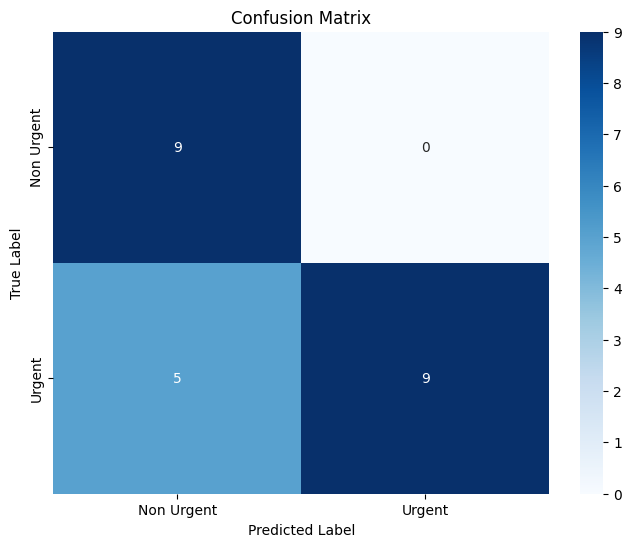

In [ ]:
def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        pitch_range
    ]

    return features

def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y

# Define paths to the "Urgent" and "Non Urgent" folders in your Google Drive
audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create ensemble classifier using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('dt', dt_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(X_train_scaled, y_train)
# Define and train the model
#model = XGBClassifier()
#model = SVC(kernel='rbf', C=1.0, gamma = 'scale')
#model = DecisionTreeClassifier(random_state=42)
ensemble_classifier.fit(X_train_scaled, y_train)

# Evaluate model performance
y_pred = ensemble_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Urgent', 'Urgent'], yticklabels=['Non Urgent', 'Urgent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-52-5c58850423b2>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-52-5c58850423b2>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-52-5c58850423b2>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: Futur

Accuracy: 0.8571428571428571


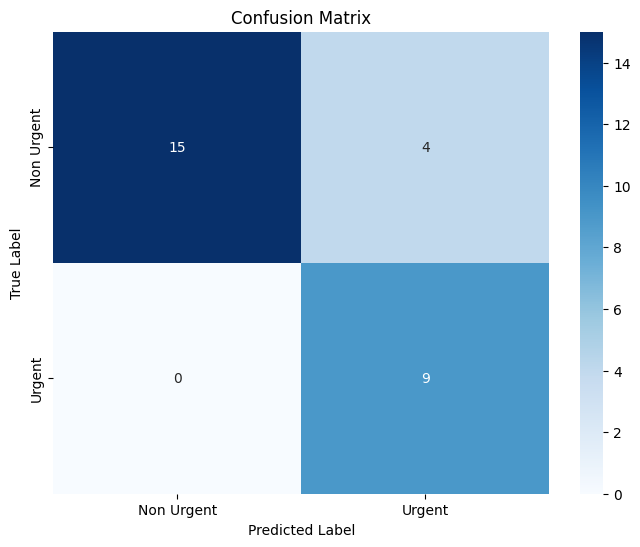

In [ ]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))

    # Zero crossing rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        zero_crossing_rate,
        pitch_range,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff
    ]

    return features

def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y

# Define paths to the "Urgent" and "Non Urgent" folders in your Google Drive
audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base classifiers
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define meta-classifier
meta_classifier = DecisionTreeClassifier(random_state=42)

# Create stacking ensemble
ensemble_classifier = StackingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('dt', dt_classifier)
    ],
    final_estimator=meta_classifier,
    stack_method='auto'
)

# Train the stacking ensemble
ensemble_classifier.fit(X_train_scaled, y_train)

# Evaluate model performance
y_pred = ensemble_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Urgent', 'Urgent'], yticklabels=['Non Urgent', 'Urgent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install joblib

In [ ]:
import joblib
# Save the trained model to a file

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [ ]:
import librosa
import numpy as np

def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))

    # Zero crossing rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        zero_crossing_rate,
        pitch_range,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff
    ]

    return features

# Load the audio file
unknown_audio_file = 'urgent2.mpeg'  # Replace 'path_to_unknown_audio_file.wav' with the path to your unknown audio file
features = extract_audio_features(unknown_audio_file)

# Standardize features using the same scaler used during training
X_unknown = np.array(features).reshape(1, -1)  # Reshape to a 2D array as expected by the scaler
X_unknown_scaled = scaler.transform(X_unknown)

# Use the trained stacking ensemble model to predict urgency level
urgency_level = ensemble_classifier.predict(X_unknown_scaled)[0]
confidence_scores = ensemble_classifier.predict_proba(X_unknown_scaled)[0]
print("Predicted Urgency Level:", urgency_level)
print("Confidence Scores:", confidence_scores)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
!pip install sounddevice